In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import joblib


In [2]:
file_path = r'C:\Users\sara1\OneDrive\Documents\archive\Dataset_for_AQI_Classification\Dataset_for_AQI_Classification\train_data.csv'
data = pd.read_csv(file_path)
data

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Tamil Nadu,TN_UnFSG_2023-03-02-08.30-1.jpg,2023,3,2,8:30,119,69.00,106.00,8.00,358.00,22.00,26.00,c_Unhealthy_for_Sensitive_Groups
1,Bengaluru,BENGR_Mod_2023-02-24-08.30-1-166.jpg,2023,2,24,8:30,68,32.00,61.00,26.00,228.00,5.00,21.00,b_Moderate
2,"Biratnagar, Nepal",BIR_UNFSG_VF_2023-02-03-15.00-2-24.jpg,2023,2,3,15:00,141,47.96,68.92,65.57,0.41,2.80,2.51,c_Unhealthy_for_Sensitive_Groups
3,Mumbai,MH_UnFSG_2023-03-10-16.00-1-76.jpg,2023,3,10,16:00,141,72.00,108.00,NaN,NaN,NaN,63.00,c_Unhealthy_for_Sensitive_Groups
4,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-2-8.jpg,2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.00,57.00,f_Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,"Biratnagar, Nepal",BRI_Un_2023-02-09-08.00-1.jpg,2023,2,9,8:00,171,112.46,163.45,31.17,0.96,3.84,18.78,d_Unhealthy
7829,"ITO, Delhi",DEL_SEV_2023-02-17-13.00-2-25.jpg,2023,2,17,13:00,372,348.00,199.00,25.00,67.00,10.00,107.00,f_Severe
7830,"New Ind Town, Faridabad",HAR_VUN_2022-10-02-10.00-1-1489.jpg,2022,10,2,10:00,230,185.00,199.00,10.00,52.00,12.00,26.00,e_Very_Unhealthy
7831,Mumbai,MH_UnFSG_2023-03-14-13.00-1-385.jpg,2023,3,14,13:00,138,90.00,120.00,143.00,21.00,9.00,16.00,c_Unhealthy_for_Sensitive_Groups


In [3]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
            Location                                Filename  Year  Month  \
0         Tamil Nadu         TN_UnFSG_2023-03-02-08.30-1.jpg  2023      3   
1          Bengaluru    BENGR_Mod_2023-02-24-08.30-1-166.jpg  2023      2   
2  Biratnagar, Nepal  BIR_UNFSG_VF_2023-02-03-15.00-2-24.jpg  2023      2   
3             Mumbai      MH_UnFSG_2023-03-10-16.00-1-76.jpg  2023      3   
4         ITO, Delhi        DEL_SEV_2023-02-07-14.00-2-8.jpg  2023      2   

   Day   Hour  AQI   PM2.5    PM10     O3      CO   SO2    NO2  \
0    2   8:30  119   69.00  106.00   8.00  358.00  22.0  26.00   
1   24   8:30   68   32.00   61.00  26.00  228.00   5.0  21.00   
2    3  15:00  141   47.96   68.92  65.57    0.41   2.8   2.51   
3   10  16:00  141   72.00  108.00    NaN     NaN   NaN  63.00   
4    7  14:00  449  337.00  198.00  23.00   24.00  13.0  57.00   

                          AQI_Class  
0  c_Unhealthy_for_Sensitive_Groups  
1                        b_Modera

In [4]:
print("Columns of the dataset:")
print(data.columns)

Columns of the dataset:
Index(['Location', 'Filename', 'Year', 'Month', 'Day', 'Hour', 'AQI', 'PM2.5',
       'PM10', 'O3', 'CO', 'SO2', 'NO2', 'AQI_Class'],
      dtype='object')


In [5]:
print("\nDataset Information:")
print(data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   7833 non-null   object 
 1   Filename   7833 non-null   object 
 2   Year       7833 non-null   int64  
 3   Month      7833 non-null   int64  
 4   Day        7833 non-null   int64  
 5   Hour       7833 non-null   object 
 6   AQI        7833 non-null   int64  
 7   PM2.5      7833 non-null   float64
 8   PM10       7833 non-null   float64
 9   O3         7646 non-null   float64
 10  CO         7476 non-null   float64
 11  SO2        6897 non-null   float64
 12  NO2        7560 non-null   float64
 13  AQI_Class  7833 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 856.9+ KB
None


In [6]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
              Year        Month          Day          AQI        PM2.5  \
count  7833.000000  7833.000000  7833.000000  7833.000000  7833.000000   
mean   2022.948806     2.675731    12.088600   167.496362   142.615333   
std       0.220407     1.756803     8.288886   102.446227   130.099442   
min    2022.000000     2.000000     1.000000    15.000000     4.000000   
25%    2023.000000     2.000000     3.000000    97.000000    35.000000   
50%    2023.000000     2.000000    13.000000   152.000000    70.080000   
75%    2023.000000     3.000000    20.000000   230.000000   257.000000   
max    2023.000000    10.000000    28.000000   450.000000   500.000000   

              PM10           O3           CO          SO2          NO2  
count  7833.000000  7646.000000  7476.000000  6897.000000  7560.000000  
mean    145.115133    39.362828   101.013596    13.328538    37.936238  
std     103.524800    33.048123   115.947148     9.912162    39.728267  
min       7.000000  

In [7]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Location       0
Filename       0
Year           0
Month          0
Day            0
Hour           0
AQI            0
PM2.5          0
PM10           0
O3           187
CO           357
SO2          936
NO2          273
AQI_Class      0
dtype: int64


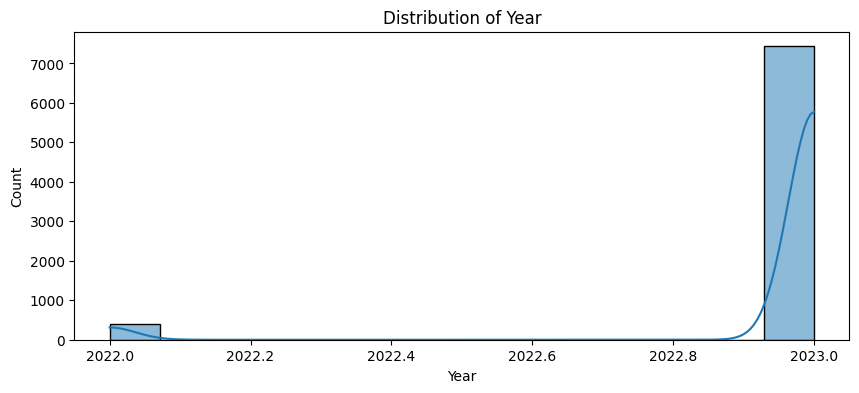

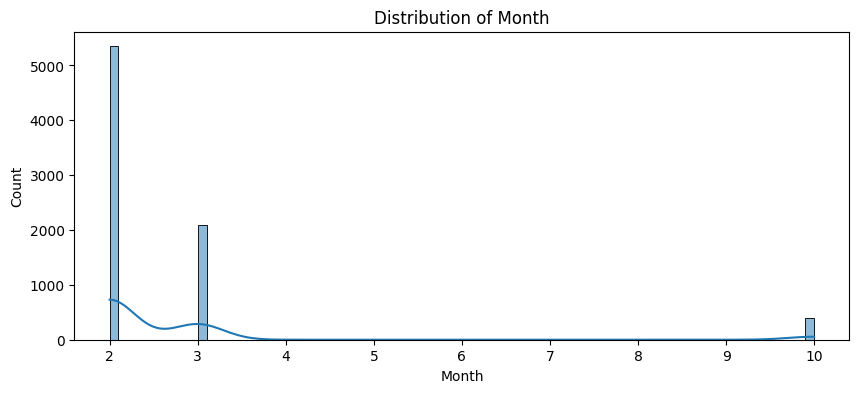

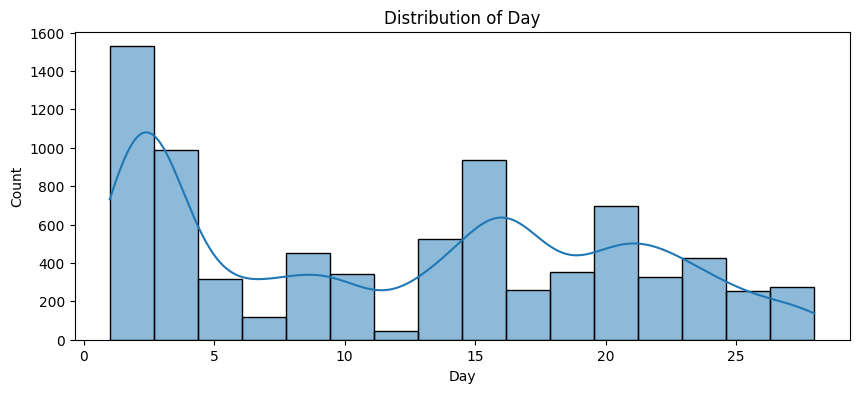

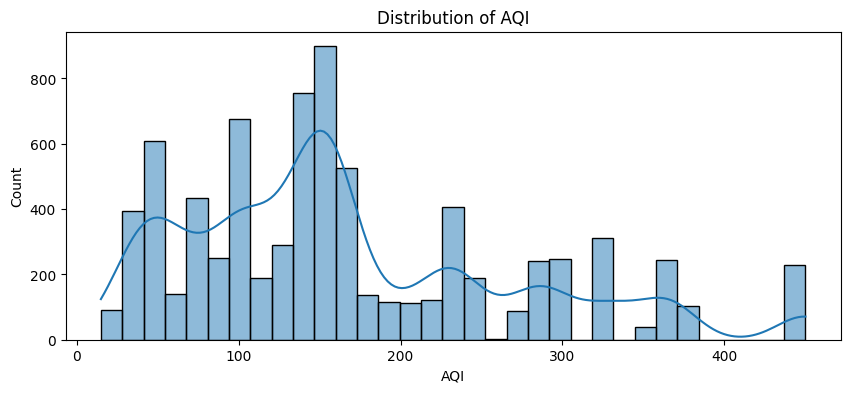

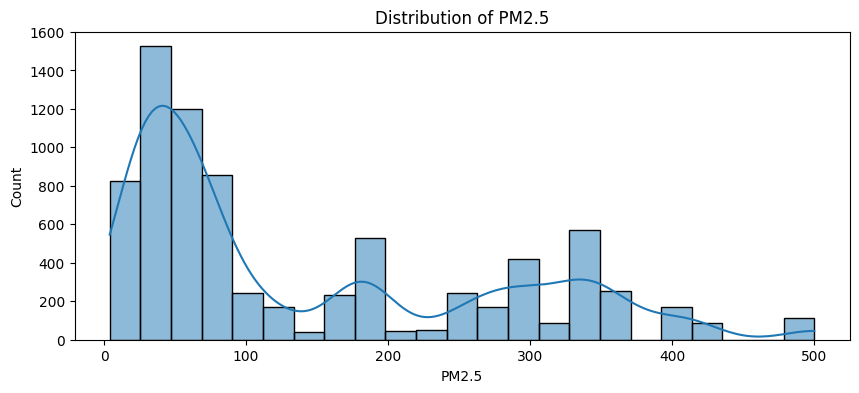

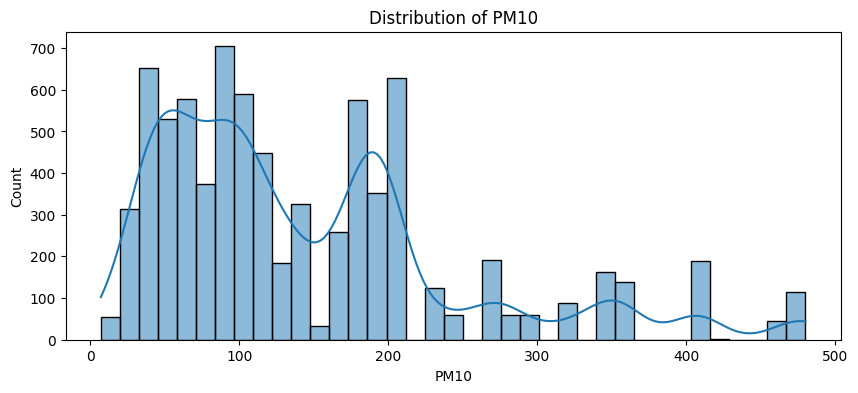

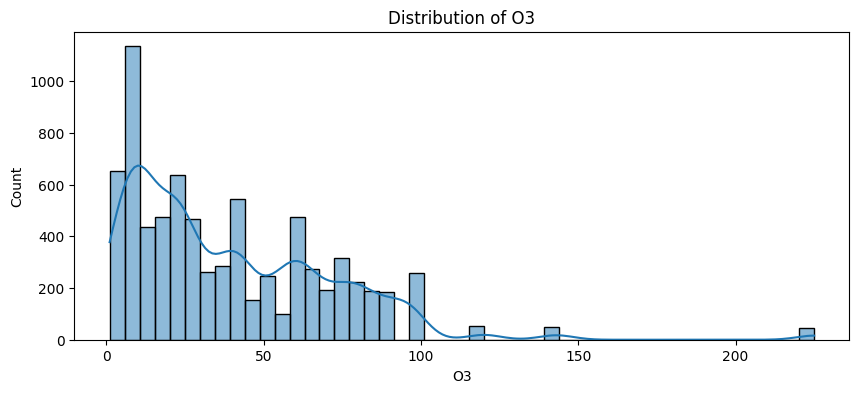

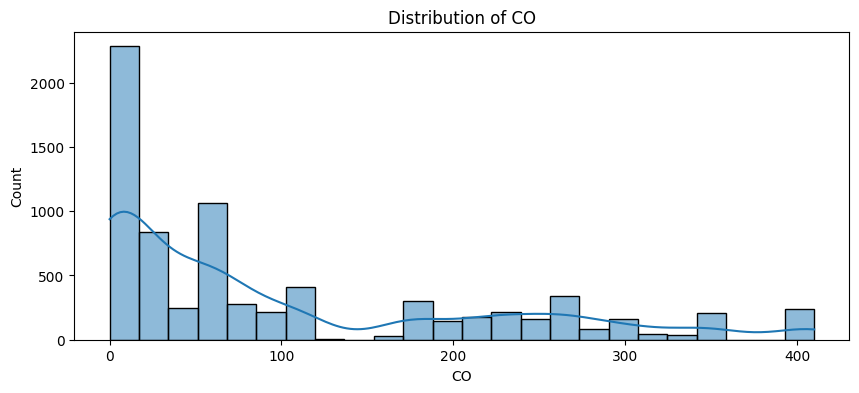

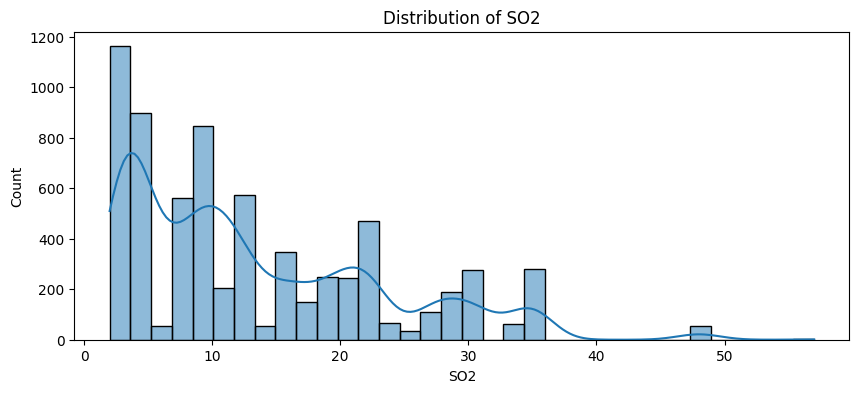

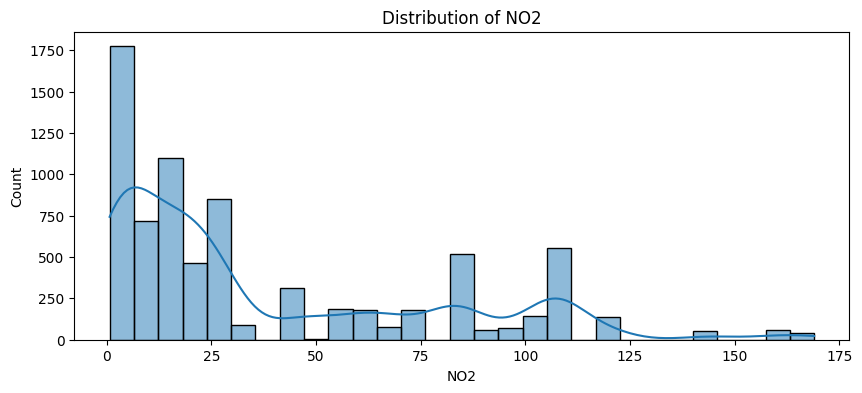

In [8]:
numerical_features = data.select_dtypes(include=[np.number])
for column in numerical_features.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

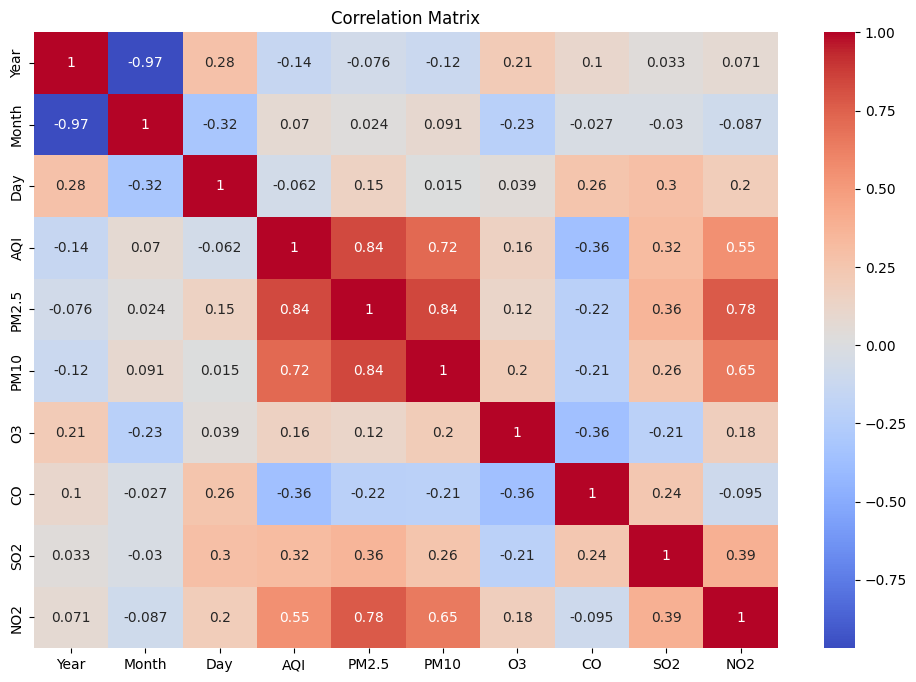

In [9]:
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



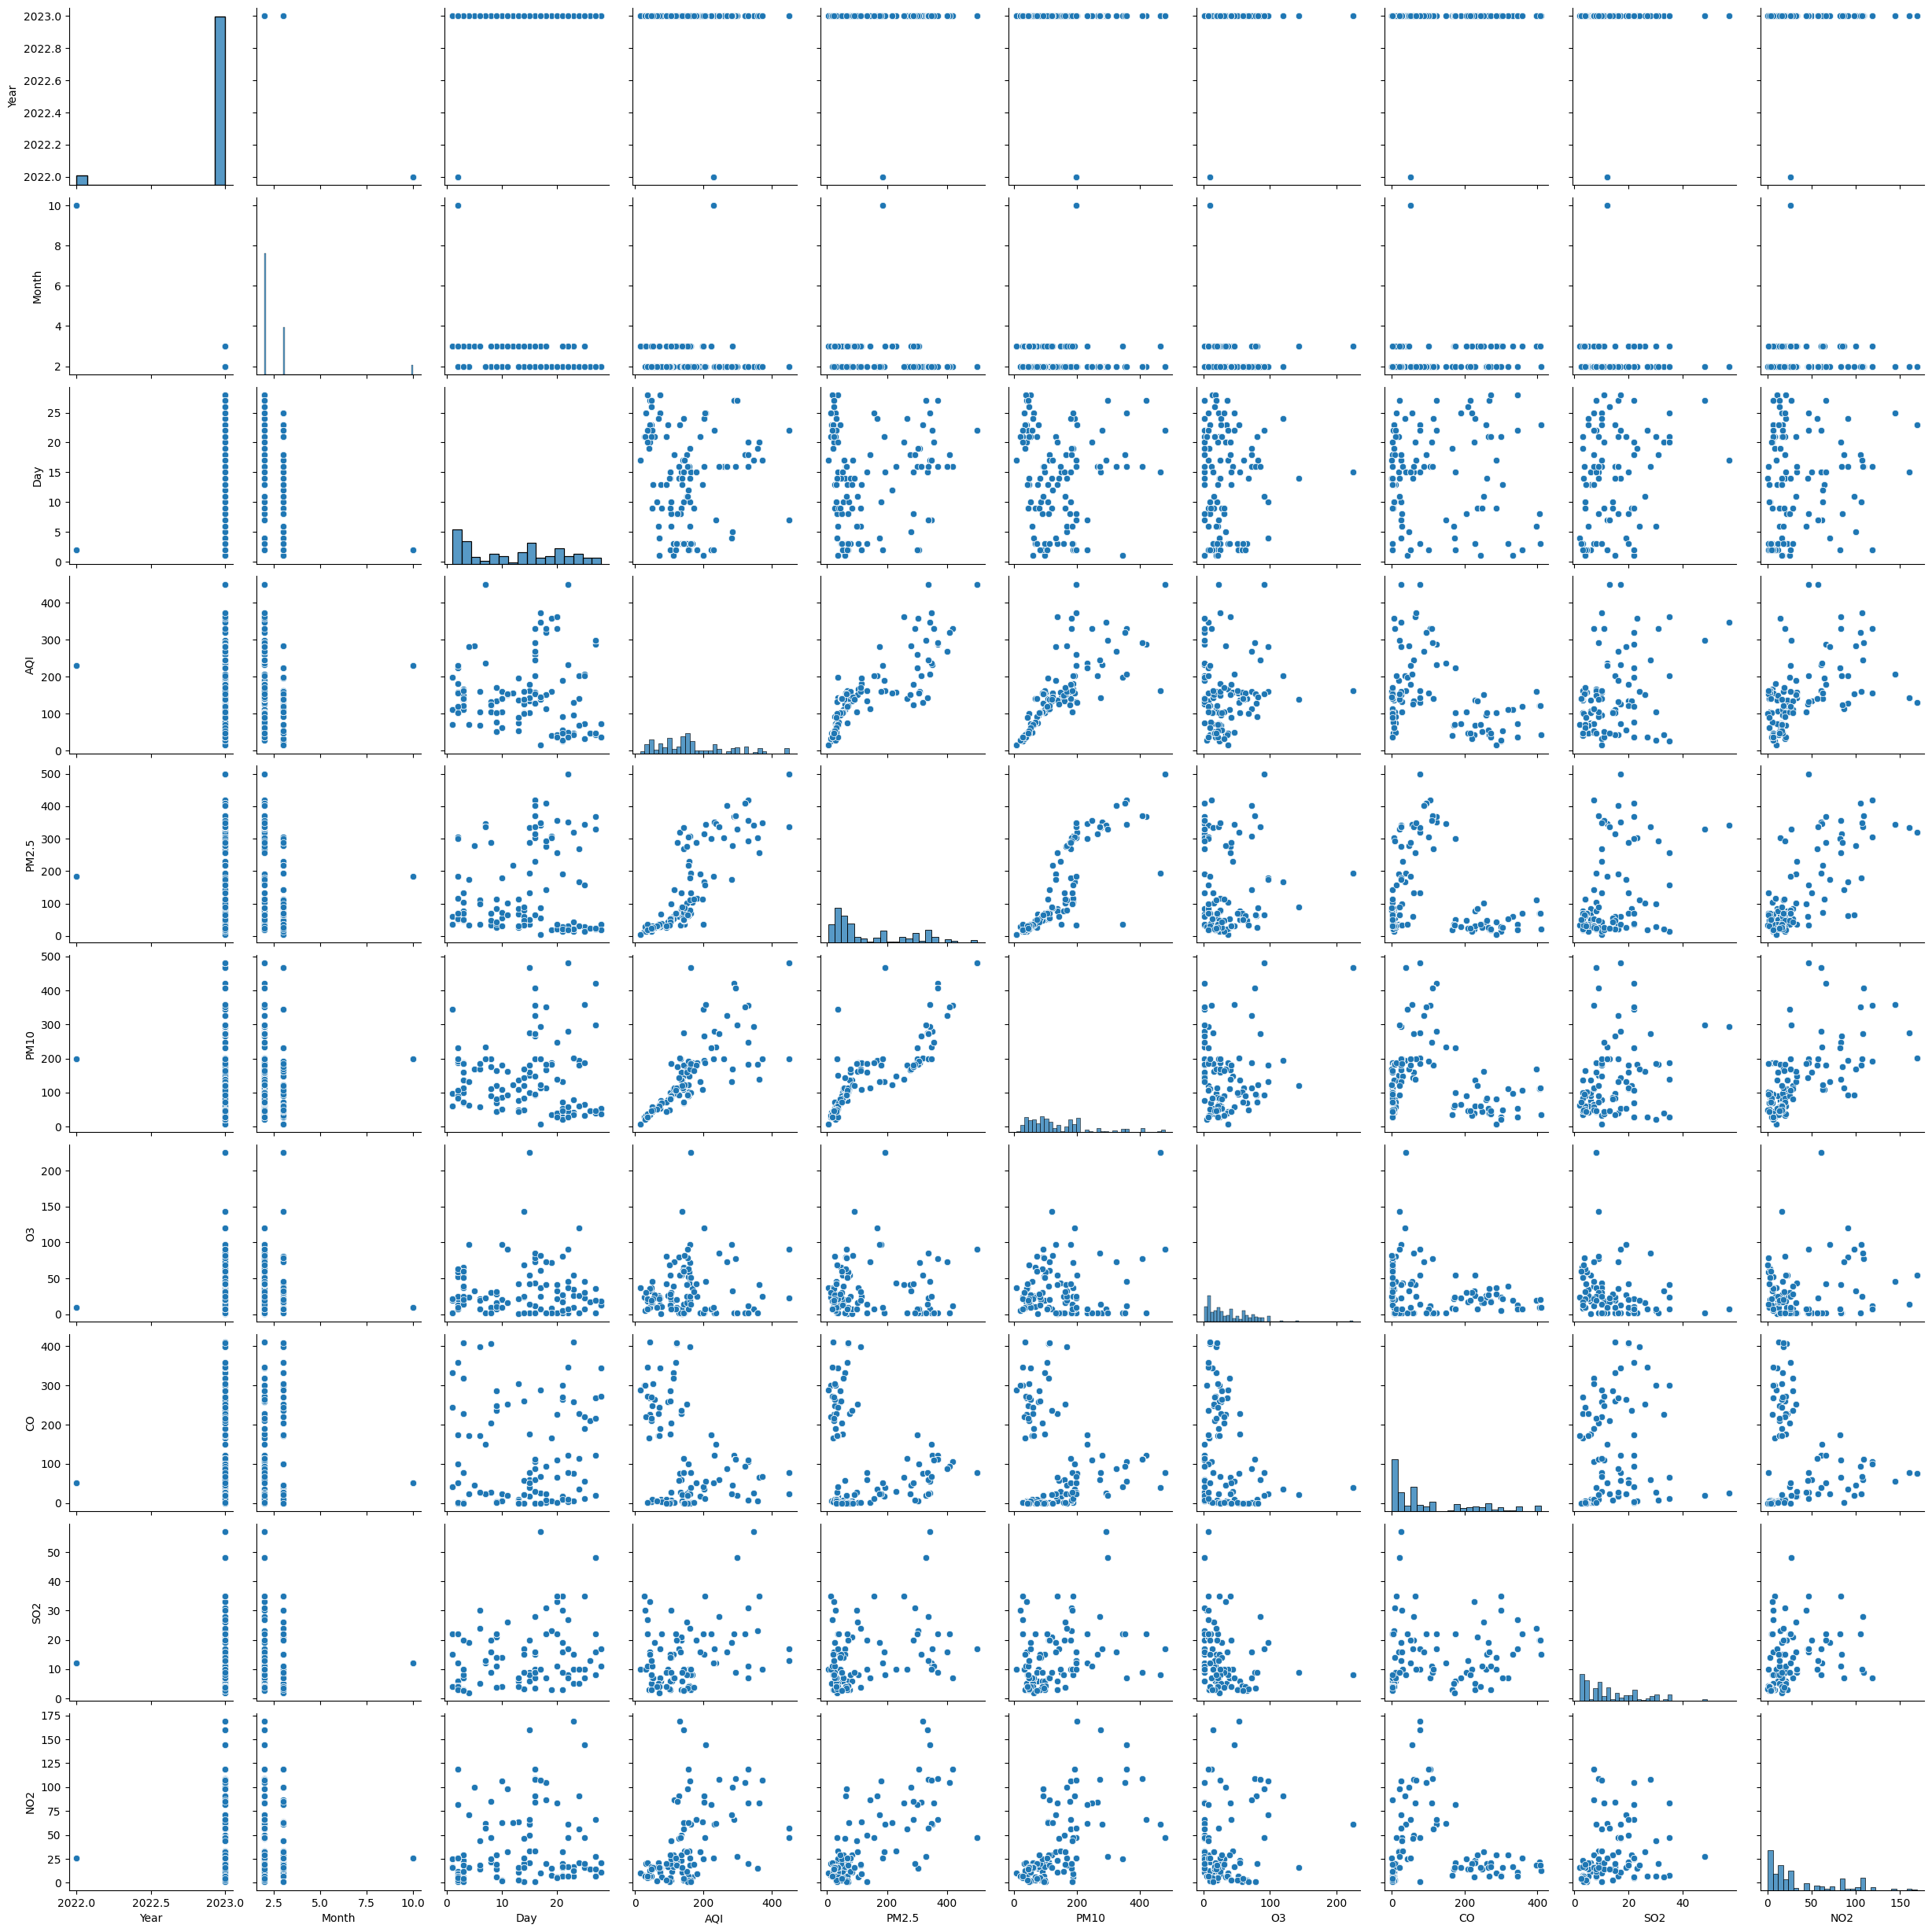

In [10]:
sns.pairplot(numerical_features)
plt.show()

In [11]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

data[non_numeric_columns] = data[non_numeric_columns].apply(lambda x: x.fillna('Unknown'), axis=0)

print("Missing values after handling:")
print(data.isnull().sum())

Missing values after handling:
Location     0
Filename     0
Year         0
Month        0
Day          0
Hour         0
AQI          0
PM2.5        0
PM10         0
O3           0
CO           0
SO2          0
NO2          0
AQI_Class    0
dtype: int64


In [12]:
for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])
X = data.drop(columns=['AQI_Class'])
y = data['AQI_Class']

categorical_cols = X.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

X = X.drop(columns=categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded, index=X.index, columns=encoder.get_feature_names_out(categorical_cols))
X = pd.concat([X, X_encoded_df], axis=1)

X.columns = X.columns.astype(str)

X = X.apply(pd.to_numeric, errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       283
           2       1.00      1.00      1.00       586
           3       1.00      1.00      1.00       499
           4       1.00      1.00      1.00       429
           5       1.00      1.00      1.00       262

    accuracy                           1.00      2350
   macro avg       1.00      1.00      1.00      2350
weighted avg       1.00      1.00      1.00      2350



In [14]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']

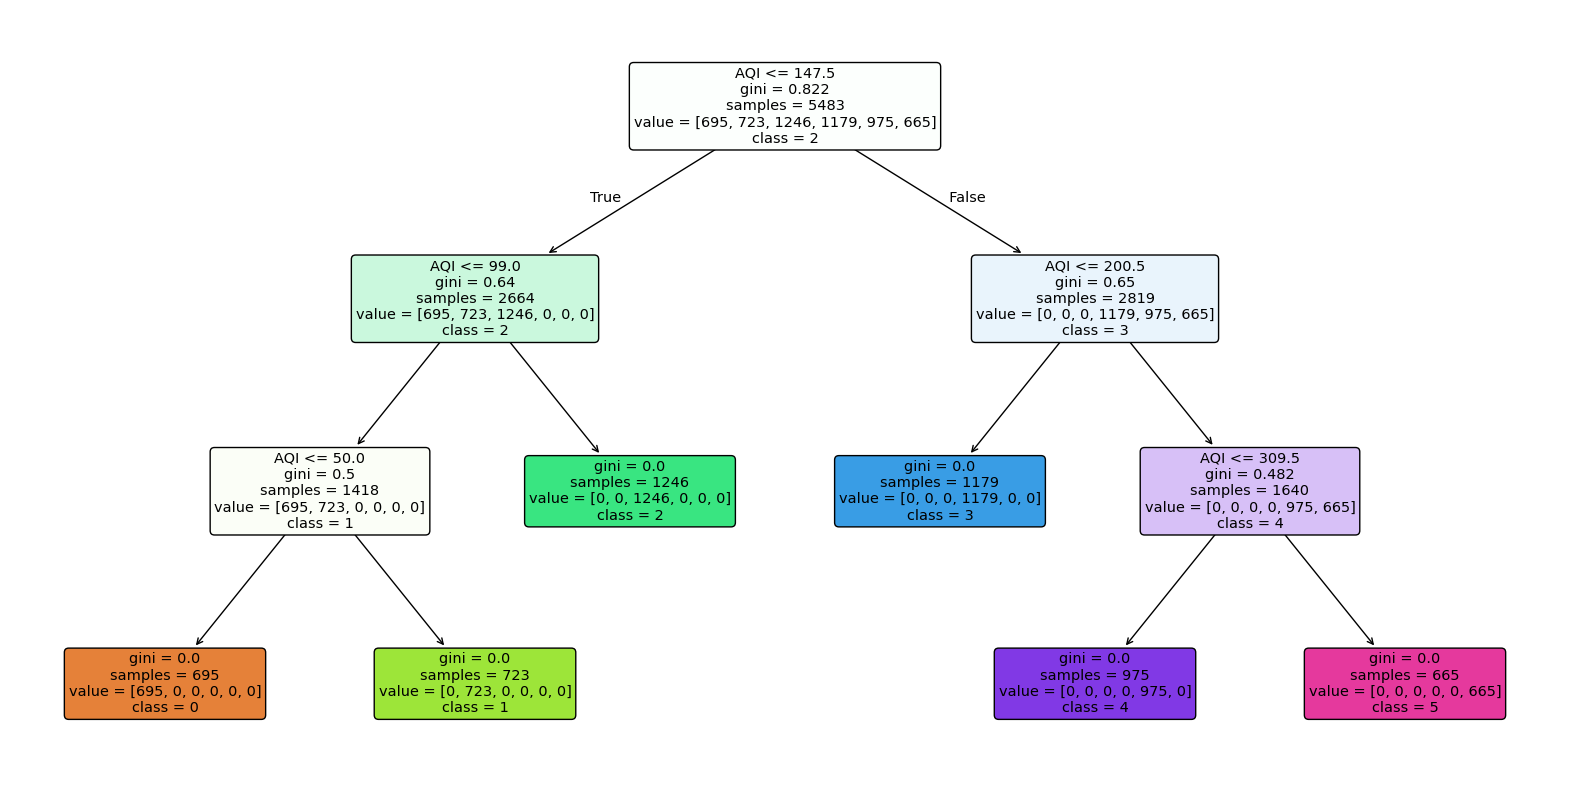

In [15]:
plt.figure(figsize=(20,10))
feature_names = list(X.columns)
class_names = [str(c) for c in model.classes_]
plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()

In [16]:
file_path = r'C:\Users\sara1\OneDrive\Documents\archive\Dataset_for_AQI_Classification\Dataset_for_AQI_Classification\testing_data.csv' 
test_data = pd.read_csv(file_path)
test_data

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-9.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
1,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 12.00-3-72.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
2,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 12.00-3-71.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
3,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 12.00-3-65.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
4,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 12.00-3-56.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,"Dimapur, Nagaland",Dimapur_MOD_2023-02-10-08.30-2-63.jpg,2023,2,10,8:30,63,31.00,52.00,10.00,6.00,4.0,2.00,b_Moderate
2444,"Dimapur, Nagaland",Dimapur_MOD_2023-02-10-08.30-2-66.jpg,2023,2,10,8:30,63,31.00,52.00,10.00,6.00,4.0,2.00,b_Moderate
2445,"Dimapur, Nagaland",Dimapur_MOD_2023-02-10-08.30-2-74.jpg,2023,2,10,8:30,63,31.00,52.00,10.00,6.00,4.0,2.00,b_Moderate
2446,"Dimapur, Nagaland",Dimapur_MOD_2023-02-10-08.30-2-77.jpg,2023,2,10,8:30,63,31.00,52.00,10.00,6.00,4.0,2.00,b_Moderate


In [17]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Location  Filename  Year  Month  Day  Hour  AQI   PM2.5    PM10         O3  \
0         7      6818  2023      3    2    18  119   69.00  106.00   8.000000   
1         0       547  2023      2   24    18   68   32.00   61.00  26.000000   
2         1      1696  2023      2    3    10  141   47.96   68.92  65.570000   
3         5      5757  2023      3   10    12  141   72.00  108.00  39.362828   
4         3      2721  2023      2    7     8  449  337.00  198.00  23.000000   

           CO        SO2    NO2  AQI_Class  
0  358.000000  22.000000  26.00          2  
1  228.000000   5.000000  21.00          1  
2    0.410000   2.800000   2.51          2  
3  101.013596  13.328538  63.00          2  
4   24.000000  13.000000  57.00          5  


In [18]:
print("Columns of the dataset:")
print(data.columns)

Columns of the dataset:
Index(['Location', 'Filename', 'Year', 'Month', 'Day', 'Hour', 'AQI', 'PM2.5',
       'PM10', 'O3', 'CO', 'SO2', 'NO2', 'AQI_Class'],
      dtype='object')


In [19]:
print("\nDataset Information:")
print(data.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   7833 non-null   int32  
 1   Filename   7833 non-null   int32  
 2   Year       7833 non-null   int64  
 3   Month      7833 non-null   int64  
 4   Day        7833 non-null   int64  
 5   Hour       7833 non-null   int32  
 6   AQI        7833 non-null   int64  
 7   PM2.5      7833 non-null   float64
 8   PM10       7833 non-null   float64
 9   O3         7833 non-null   float64
 10  CO         7833 non-null   float64
 11  SO2        7833 non-null   float64
 12  NO2        7833 non-null   float64
 13  AQI_Class  7833 non-null   int32  
dtypes: float64(6), int32(4), int64(4)
memory usage: 734.5 KB
None


In [20]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
          Location     Filename         Year        Month          Day  \
count  7833.000000  7833.000000  7833.000000  7833.000000  7833.000000   
mean      3.279714  3916.000000  2022.948806     2.675731    12.088600   
std       2.320308  2261.336662     0.220407     1.756803     8.288886   
min       0.000000     0.000000  2022.000000     2.000000     1.000000   
25%       1.000000  1958.000000  2023.000000     2.000000     3.000000   
50%       3.000000  3916.000000  2023.000000     2.000000    13.000000   
75%       5.000000  5874.000000  2023.000000     3.000000    20.000000   
max       7.000000  7832.000000  2023.000000    10.000000    28.000000   

              Hour          AQI        PM2.5         PM10           O3  \
count  7833.000000  7833.000000  7833.000000  7833.000000  7833.000000   
mean     11.680199   167.496362   142.615333   145.115133    39.362828   
std       6.604544   102.446227   130.099442   103.524800    32.651204   
min       0.0000

In [21]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Location     0
Filename     0
Year         0
Month        0
Day          0
Hour         0
AQI          0
PM2.5        0
PM10         0
O3           0
CO           0
SO2          0
NO2          0
AQI_Class    0
dtype: int64


In [22]:
X_test = test_data.drop(columns=['AQI_Class'], errors='ignore')
y_test_actual = test_data['AQI_Class'] if 'AQI_Class' in test_data.columns else None

numeric_columns = X_test.select_dtypes(include=[np.number]).columns
non_numeric_columns = X_test.select_dtypes(exclude=[np.number]).columns

X_test[numeric_columns] = X_test[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0)
X_test[non_numeric_columns] = X_test[non_numeric_columns].apply(lambda x: x.fillna('Unknown'), axis=0)

for column in X_test.select_dtypes(include=['object']).columns:
    X_test[column] = LabelEncoder().fit_transform(X_test[column])

categorical_cols = X_test.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_test_encoded = encoder.fit_transform(X_test[categorical_cols])
X_test = X_test.drop(columns=categorical_cols)
X_test_encoded_df = pd.DataFrame(X_test_encoded, index=X_test.index, columns=encoder.get_feature_names_out(categorical_cols))
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

X_test.columns = X_test.columns.astype(str)
X_test = X_test.apply(pd.to_numeric, errors='coerce')

model = joblib.load('model.pkl')  

y_test_pred = model.predict(X_test)

print("Predicted AQI Classes:")
print(y_test_pred)

Predicted AQI Classes:
[3 3 3 ... 1 1 1]


In [23]:
if y_test_actual is not None:
    from sklearn.metrics import classification_report, accuracy_score
    y_test_actual = LabelEncoder().fit_transform(y_test_actual)

    accuracy = accuracy_score(y_test_actual, y_test_pred)
    report = classification_report(y_test_actual, y_test_pred)
    
    print(f"\nAccuracy: {accuracy}")
    print("Classification Report:")
    print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       569
           3       1.00      1.00      1.00       526
           4       1.00      1.00      1.00       440
           5       1.00      1.00      1.00       289

    accuracy                           1.00      2448
   macro avg       1.00      1.00      1.00      2448
weighted avg       1.00      1.00      1.00      2448

